# Jamboree_CaseStudy

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [90]:
df=pd.read_csv('Jamboree_Admission.csv')

# Data Exploration

In [91]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [92]:
df.shape

(500, 9)

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


We can obeserve that there are no null values in any of the features.

In [94]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [95]:
df[df.duplicated()]

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit


We can observe that there are no duplicates

In [96]:
df.columns = df.columns.str.strip()

# EDA

In [97]:
# Dropping Serian No. column as it doesn't have any significance in the outcome
df.drop(['Serial No.'], axis=1, inplace=True)

**Univariate Analysis**

In [98]:
sns.set_theme(style = 'dark')
def feature_countplot(ax, data, feature, title='Count Plot', xlabel=None, ylabel='Count', palette='viridis'):
    sns.countplot(data=data, x=feature, palette=palette, ax=ax)

    # Adding title and labels
    ax.set_title(title, fontsize=16, fontweight='bold')
    ax.set_xlabel(xlabel if xlabel else feature, fontsize=14)
    ax.set_ylabel(ylabel, fontsize=14)

    # Customizing ticks
    ax.tick_params(axis='x', labelsize=12)
    ax.tick_params(axis='y', labelsize=12)

    # Adding value annotations on top of the bars
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom', fontsize=12)

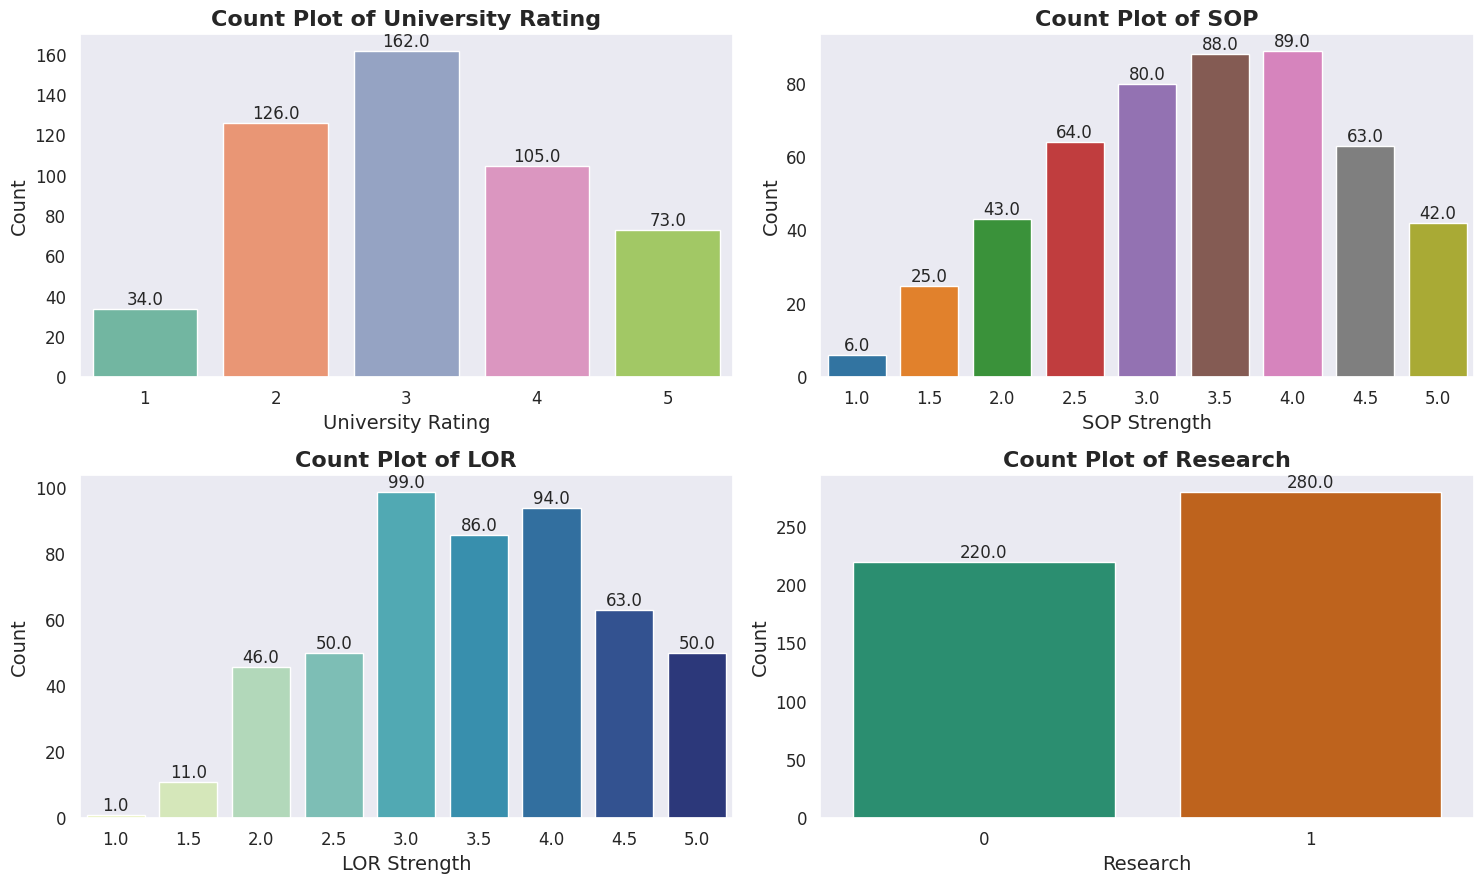

In [99]:
fig, axs = plt.subplots(2, 2, figsize=(15, 9))
fig.subplots_adjust(hspace=0.4, wspace=0.3)

feature_countplot(axs[0, 0], data=df, feature='University Rating', title='Count Plot of University Rating', ylabel='Count', palette='Set2')
feature_countplot(axs[0, 1], data=df, feature='SOP', title='Count Plot of SOP', xlabel='SOP Strength', ylabel='Count', palette='tab10')
feature_countplot(axs[1, 0], data=df, feature='LOR', title='Count Plot of LOR', xlabel='LOR Strength', ylabel='Count', palette='YlGnBu')
feature_countplot(axs[1, 1], data=df, feature='Research', title='Count Plot of Research', xlabel='Research', ylabel='Count', palette='Dark2')

plt.tight_layout()
plt.show()




*   From the above plots, the most common SOP and LOR have strengths in the range of 3-4.

*   Many individuals from universities with ratings of 2 or 3 take the GRE.



In [100]:
def plot_distribution_and_box(ax, data, feature):
    # Distribution Plot (KDE)
    sns.kdeplot(data[feature], ax=ax[0], color='blue', fill=True, alpha=0.5, linewidth=2)
    ax[0].set_title(f'Distribution of {feature}', fontsize=16)
    ax[0].set_xlabel(feature, fontsize=14)
    ax[0].set_ylabel('Density', fontsize=14)

    # Box Plot
    sns.boxplot(x=data[feature], ax=ax[1], color='lightgray', palette='summer')
    ax[1].set_title(f'Box Plot of {feature}', fontsize=16)
    ax[1].set_xlabel(feature, fontsize=14)

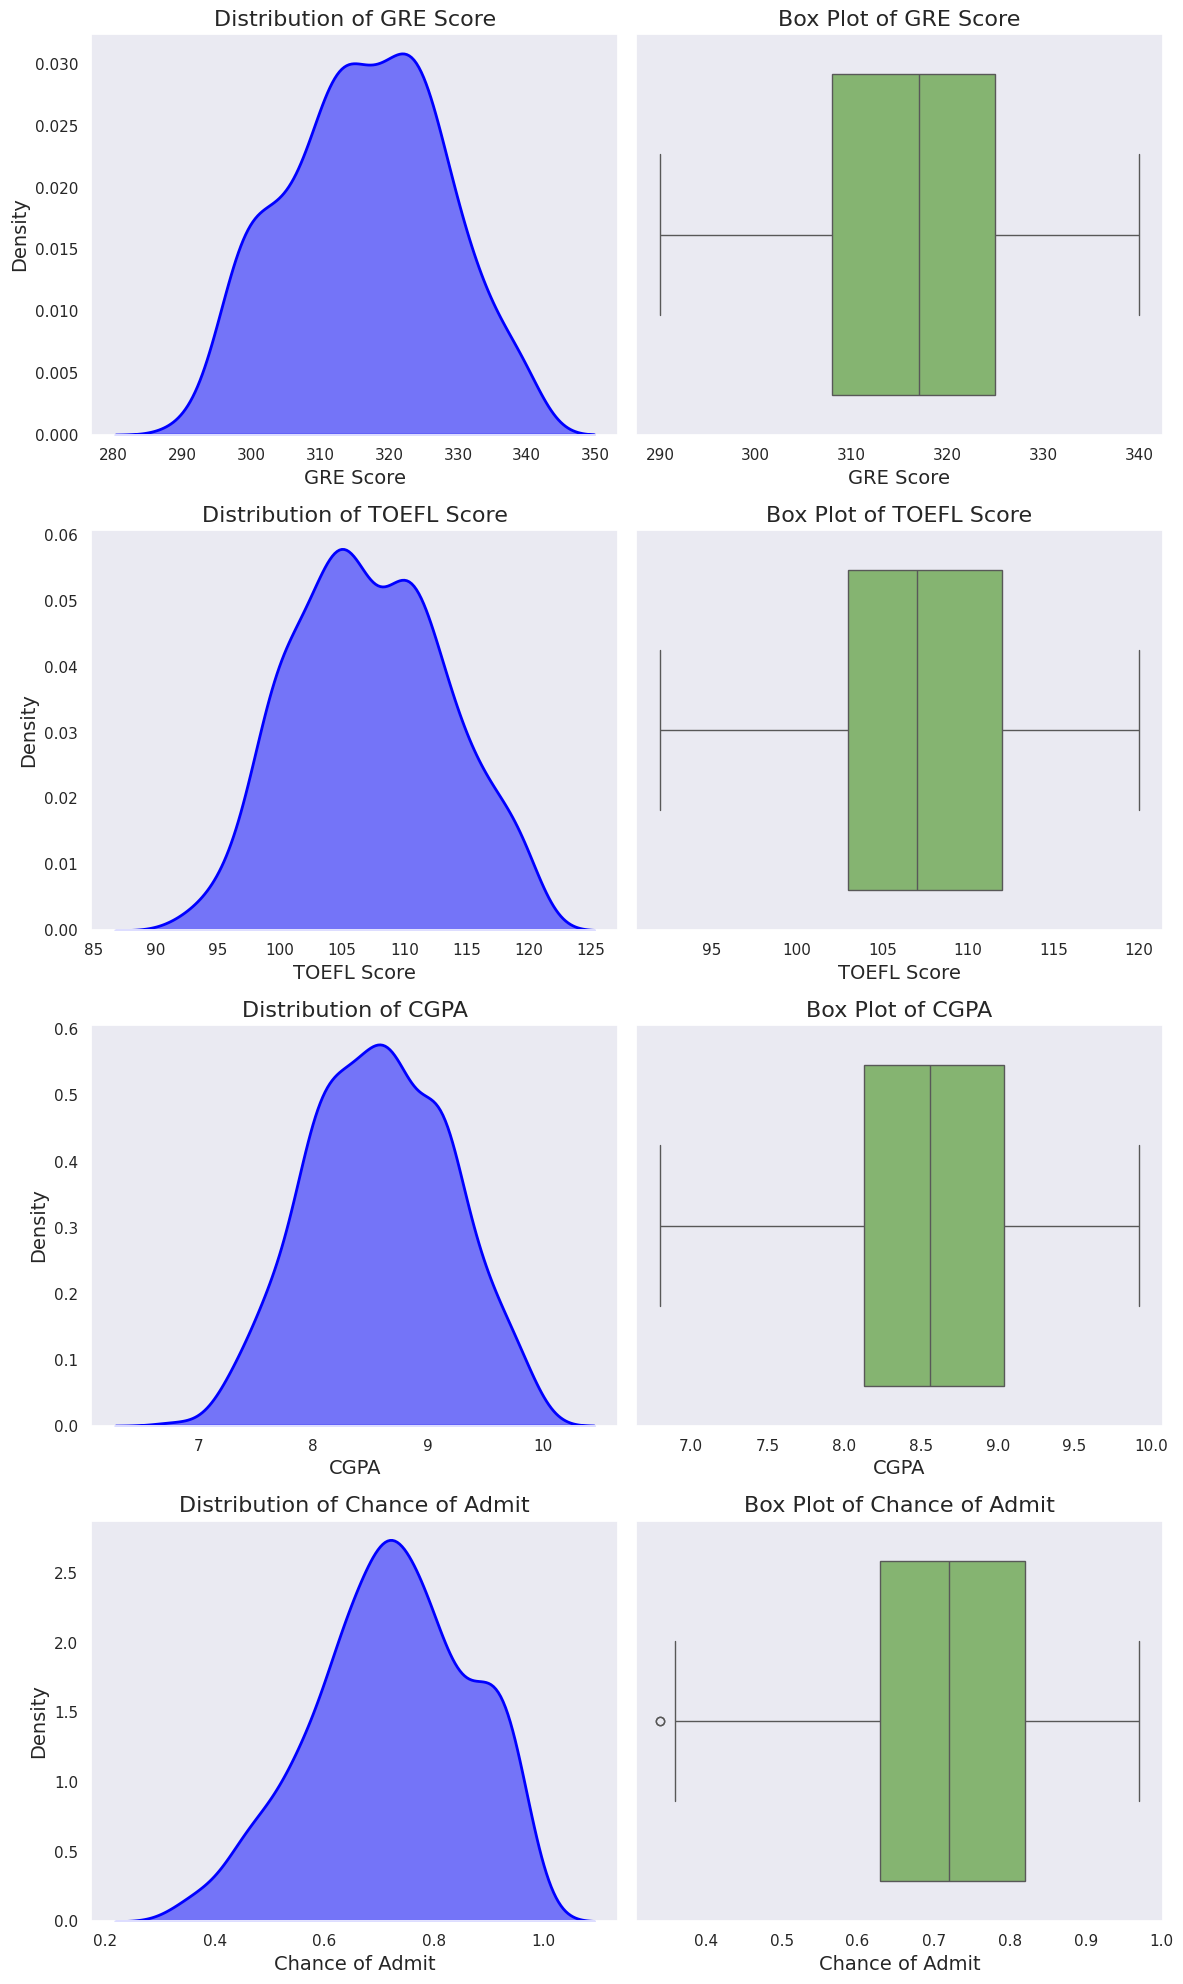

In [101]:
fig, axs = plt.subplots(4, 2, figsize=(12, 20))
fig.subplots_adjust(hspace=0.4, wspace=0.3)

plot_distribution_and_box(axs[0], df, 'GRE Score')
plot_distribution_and_box(axs[1], df, 'TOEFL Score')
plot_distribution_and_box(axs[2], df, 'CGPA')
plot_distribution_and_box(axs[3], df, 'Chance of Admit')

plt.tight_layout()
plt.show()



*   GRE score ranges from 280 to 390 with maximum students having a score between 310 to 325
Maximum students have an CGPA between 8 to 9
Chances of admit mostly range between 70% to 80%
*   TOEFL score ranges from 90 to 125, with most students scoring between 103 and 112.
*   Most students have a CGPA between 8.0 and 9.0.
*   Chances of admit mostly range between 70% to 80%






**In the analysis above, the GRE Score, TOEFL Score, and CGPA are normally distributed and have no significant outliers..**

**Bivariate Analysis**

In [104]:
sns.set_theme()
def correlation_plot(data, x_feature, y_feature, title='Scatter Plot', xlabel=None, ylabel=None):
    plt.figure(figsize=(9, 6))

    sns.scatterplot(data=data, x=x_feature, y=y_feature, alpha=0.7, color='red')

    # Adding title and labels
    plt.title(title, fontsize=16, fontweight='bold')
    plt.xlabel(xlabel if xlabel else x_feature, fontsize=14)
    plt.ylabel(ylabel if ylabel else y_feature, fontsize=14)

    plt.tight_layout()
    plt.show()

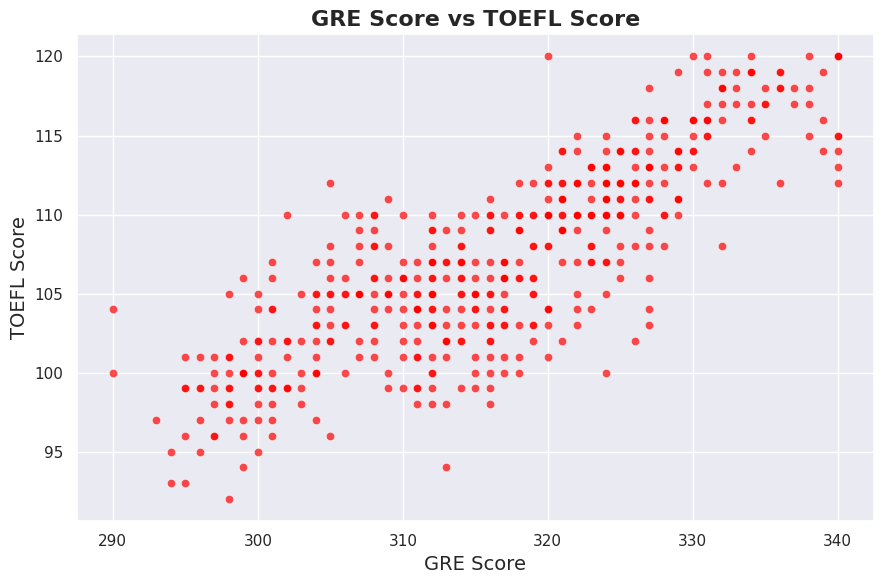

In [105]:
correlation_plot(df, 'GRE Score', 'TOEFL Score', title='GRE Score vs TOEFL Score')

GRE and TOEFL have a positive corelation, i.e, people with good GRE have a good TOEFL score


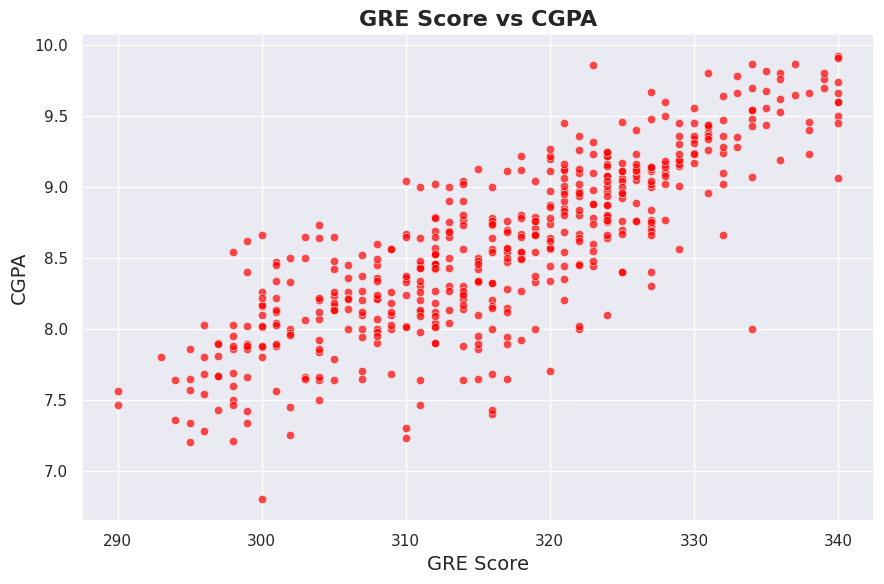

In [106]:
correlation_plot(df, 'GRE Score', 'CGPA', title='GRE Score vs CGPA')

GRE and CGPA also have a positive corelation, although not perfectly linear, the trend suggests that good CGPA is a reliable indicator for good GRE score

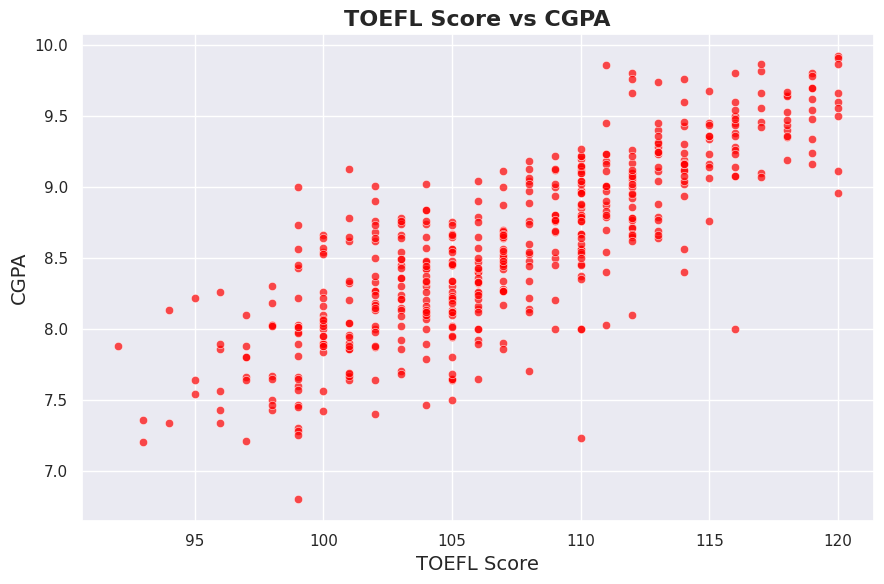

In [107]:
correlation_plot(df, 'TOEFL Score', 'CGPA', title='TOEFL Score vs CGPA')

CGPAs show some variation at similar TOEFL score levels, suggesting that other factors may also impact academic performance.

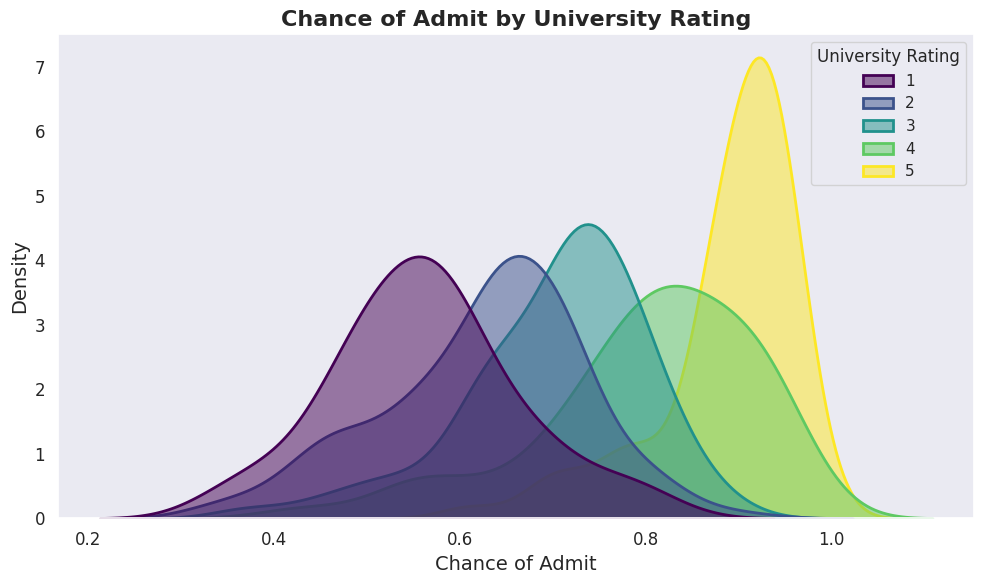

In [32]:
plt.figure(figsize=(10, 6))
sns.set_theme(style="dark")
sns.kdeplot(data=df, x='Chance of Admit', hue='University Rating',fill=True, common_norm=False, palette='viridis',alpha=0.5, linewidth=2)
plt.title('Chance of Admit by University Rating', fontsize=16, fontweight='bold')
plt.xlabel('Chance of Admit', fontsize=14)
plt.ylabel('Density', fontsize=14)

    # Customize the ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()  # Adjust layout
plt.show()


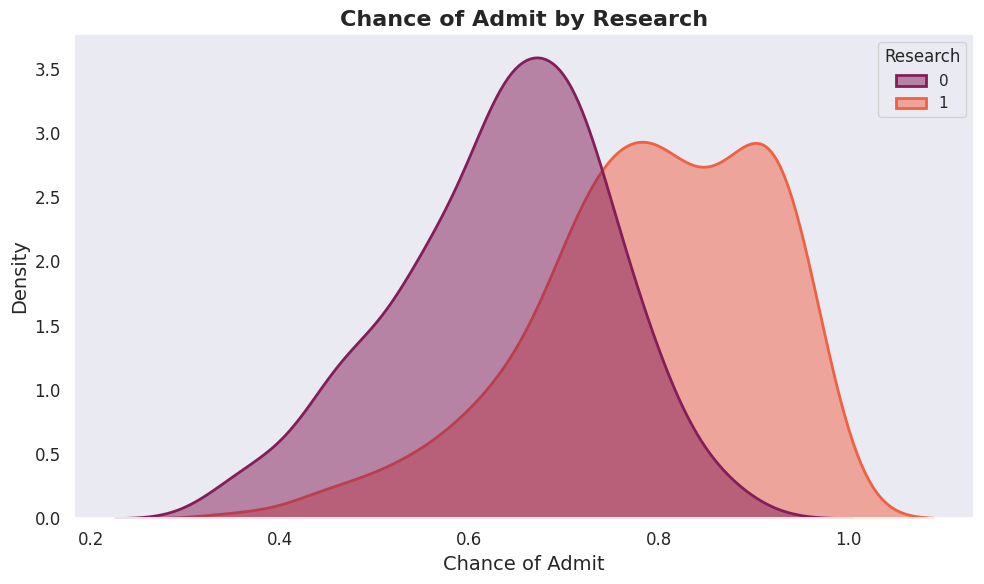

In [108]:
plt.figure(figsize=(10, 6))
sns.set_theme(style="dark")
sns.kdeplot(data=df, x='Chance of Admit', hue='Research',fill=True, common_norm=False, palette='rocket',alpha=0.5, linewidth=2)
plt.title('Chance of Admit by Research', fontsize=16, fontweight='bold')
plt.xlabel('Chance of Admit', fontsize=14)
plt.ylabel('Density', fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

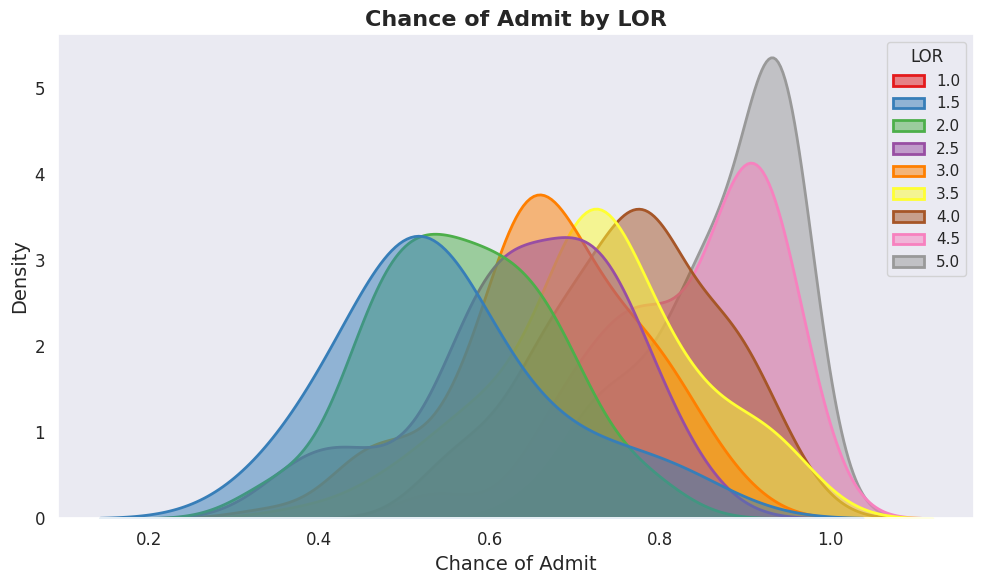

In [38]:
plt.figure(figsize=(10, 6))
sns.set_theme(style="dark")
sns.kdeplot(data=df, x='Chance of Admit', hue='LOR',fill=True, common_norm=False, palette='Set1',alpha=0.5, linewidth=2)
plt.title('Chance of Admit by LOR', fontsize=16, fontweight='bold')
plt.xlabel('Chance of Admit', fontsize=14)
plt.ylabel('Density', fontsize=14)

    # Customize the ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()  # Adjust layout
plt.show()

It is evident that the chances of admission improve with a high university ranking, strong LOR and SOP, and some research experience.

**Multivariate Analysis**

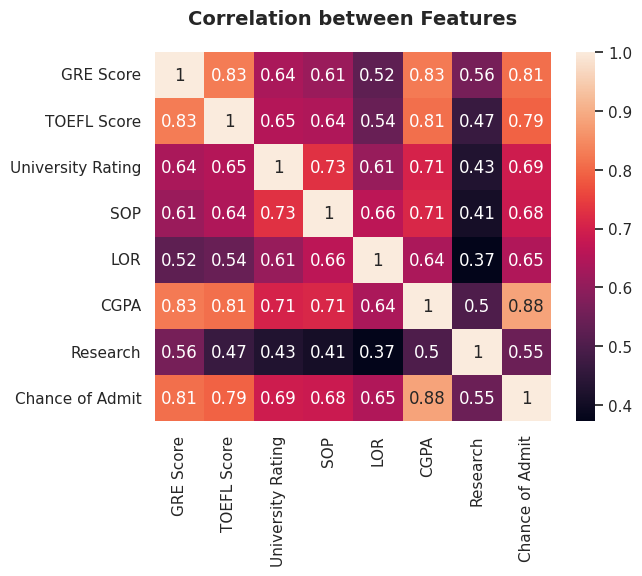

In [39]:
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation between Features', fontsize=14, fontweight='bold', pad=20)
plt.show()

GRE, TOEFL, and CGPA are strongly correlated with the chances of admission.

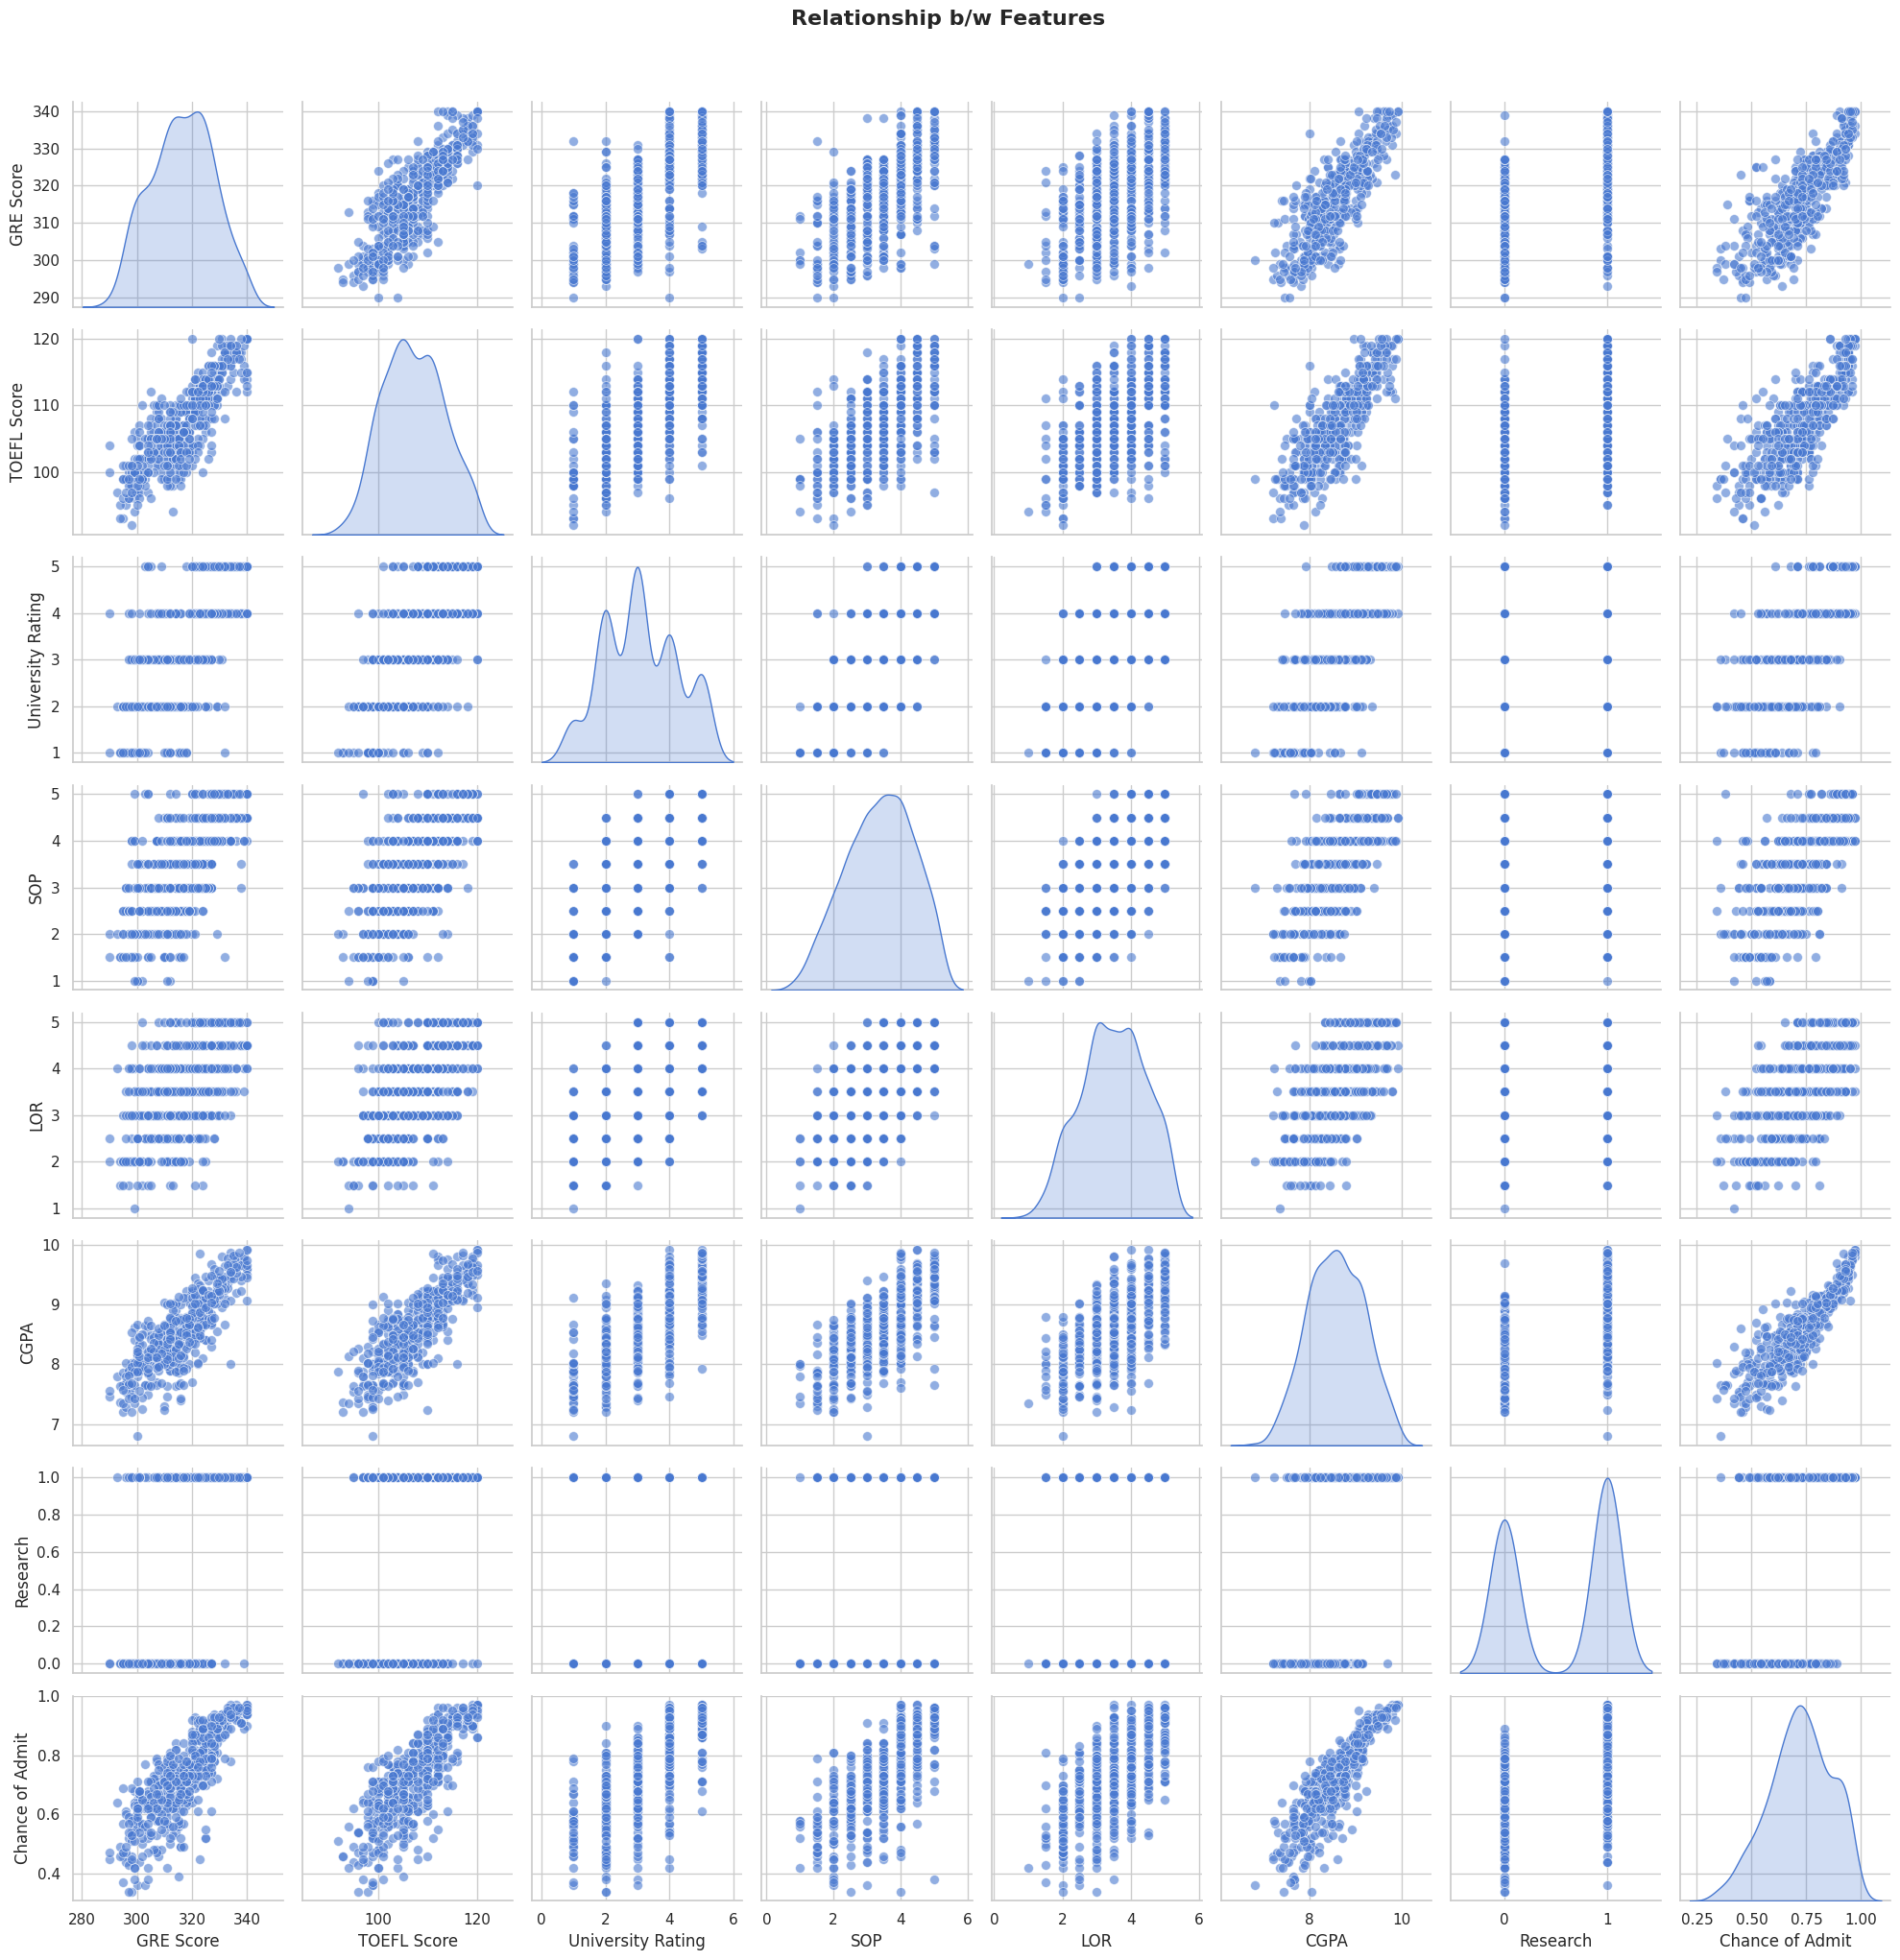

In [40]:
sns.set(style="whitegrid", palette="muted")

pair_plot = sns.pairplot(df, diag_kind="kde", markers="o", plot_kws={'alpha':0.6, 's':50})
pair_plot.fig.suptitle('Relationship b/w Features', y=1.02, fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()

GRE, TOEFL, and CGPA scores show a positive correlation with the likelihood of admission. While university ranking and the ratings of the SOP and LOR affect admission chances to some extent, research experience is the factor with the least impact.

# Data Processing

**Adding New features**

In [41]:
df['Total Score'] = (df['GRE Score']*10/340) + (df['TOEFL Score']*10/120) + df['CGPA']
df.drop(['GRE Score', 'TOEFL Score', 'CGPA'], axis=1, inplace=True)

df.head()

,University Rating,SOP,LOR,Research,Chance of Admit,Total Score
0,4,4.5,4.5,1,0.92,29.395098
1,4,4.0,4.5,1,0.76,27.316078
2,3,3.0,3.5,1,0.72,25.960784
3,3,3.5,2.5,1,0.80,27.307255
4,2,2.0,3.0,0,0.65,26.028627


**Splitting the Data**

In [42]:
X = df.drop('Chance of Admit', axis=1)
y = df['Chance of Admit']
X.shape, y.shape

((500, 5), (500,))

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape



((400, 5), (100, 5), (400,), (100,))

In [49]:
X_train.head()

,University Rating,SOP,LOR,Research,Total Score
249,3,3.5,4.0,1,27.521176
433,4,4.0,5.0,0,27.084118
19,3,3.5,3.0,0,25.911765
322,2,2.5,4.0,0,26.421961
332,3,3.5,2.5,1,26.102157


**Standardization**

In [50]:
X_train_columns = X_train.columns
X_train_columns

Index(['University Rating', 'SOP', 'LOR', 'Research', 'Total Score'], dtype='object')

In [51]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train

array([[-0.09829757,  0.12679578,  0.56498381,  0.89543386,  0.50802081],
       [ 0.7754586 ,  0.63397891,  1.65149114, -1.11677706,  0.18165641],
       [-0.09829757,  0.12679578, -0.52152352, -1.11677706, -0.69377325],
       ...,
       [-1.8458099 , -1.39475361, -1.60803084, -1.11677706, -1.835829  ],
       [-0.97205374, -0.88757048,  0.56498381, -1.11677706, -0.98763298],
       [-0.97205374,  0.63397891,  0.02173015, -1.11677706, -0.38995713]])

In [52]:
X_train = pd.DataFrame(X_train, columns=X_train_columns)
X_test = pd.DataFrame(X_test, columns=X_train_columns)
X_train.head()

,University Rating,SOP,LOR,Research,Total Score
0,-0.098298,0.126796,0.564984,0.895434,0.508021
1,0.775459,0.633979,1.651491,-1.116777,0.181656
2,-0.098298,0.126796,-0.521524,-1.116777,-0.693773
3,-0.972054,-0.887570,0.564984,-1.116777,-0.312795
4,-0.098298,0.126796,-1.064777,0.895434,-0.551602


In [53]:
X_train.describe()

,University Rating,SOP,LOR,Research,Total Score
count,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02
mean,1.598721e-16,1.332268e-17,1.776357e-17,-3.552714e-17,1.154632e-16
std,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00
min,-1.845810e+00,-2.409120e+00,-2.151285e+00,-1.116777e+00,-2.400268e+00
25%,-9.720537e-01,-8.875705e-01,-5.215235e-01,-1.116777e+00,-6.878433e-01
50%,-9.829757e-02,1.267958e-01,2.173015e-02,8.954339e-01,-1.011488e-01
75%,7.754586e-01,6.339789e-01,5.649838e-01,8.954339e-01,7.275005e-01
max,1.649215e+00,1.648345e+00,1.651491e+00,8.954339e-01,2.299291e+00


# Base Model: Linear Regression

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [55]:
print(f"Coefficients: {lr_model.coef_}")
print(f"Intercept: {lr_model.intercept_}")

Coefficients: [0.00326469 0.00271163 0.01856824 0.01261607 0.10277829]
Intercept: 0.7241749999999999


In [56]:
def model_scores(X, y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    adjusted_r2 = 1 - (1 - r2) * (len(y_true) - 1) / (len(y_true) - X.shape[1] - 1)

    print(f"Root Mean Squared Error: {rmse:.2f}")
    print(f"R-squared: {r2:.2f}")
    print(f"Adjusted R-squared: {adjusted_r2:.2f}")

In [57]:
def model_evaluation(model, X_train, y_train, X_test, y_test):
    print("Training Set Evaluation:")
    y_train_pred = model.predict(X_train)
    model_scores(X_train, y_train, y_train_pred)
    print("\nTest Set Evaluation:")
    y_test_pred = model.predict(X_test)
    model_scores(X_test, y_test, y_test_pred)

    return y_train_pred, y_test_pred

In [58]:
y_train_pred, y_test_pred = model_evaluation(lr_model, X_train, y_train, X_test, y_test)

Training Set Evaluation:
Root Mean Squared Error: 0.06
R-squared: 0.81
Adjusted R-squared: 0.81

Test Set Evaluation:
Root Mean Squared Error: 0.06
R-squared: 0.80
Adjusted R-squared: 0.79


We can see the accuracy of the Base Linear Model is 82 for both train and test data

In [59]:
sns.set_theme(style='dark')
def plot_actual_vs_predicted_and_residuals(y_test, y_pred, model_name='Lasso'):
    fig, axs = plt.subplots(1, 2, figsize=(16, 6))

    sns.regplot(x=y_test, y=y_pred, ax=axs[0], scatter_kws={'alpha': 0.6, 's': 50, 'color': 'blue'},
                line_kws={'color': 'red'}, lowess=True)

    axs[0].set_title(f"Actual vs. Predicted ({model_name} Linear Regression)", fontsize=16, fontweight='bold')
    axs[0].set_xlabel("Actual Chance of Admit", fontsize=14)
    axs[0].set_ylabel("Predicted Chance of Admit", fontsize=14)

    # Calculate residuals
    residuals = y_test - y_pred

    axs[1].scatter(y_test, residuals, alpha=0.6, color='blue', edgecolor='k', s=50)
    axs[1].axhline(0, color='red', linestyle='--')

    axs[1].set_title(f'Actual vs. Residuals ({model_name})', fontsize=16, fontweight='bold')
    axs[1].set_xlabel('Actual Values', fontsize=14)
    axs[1].set_ylabel('Residuals', fontsize=14)

    axs[1].grid(True)
    plt.tight_layout()
    plt.show()

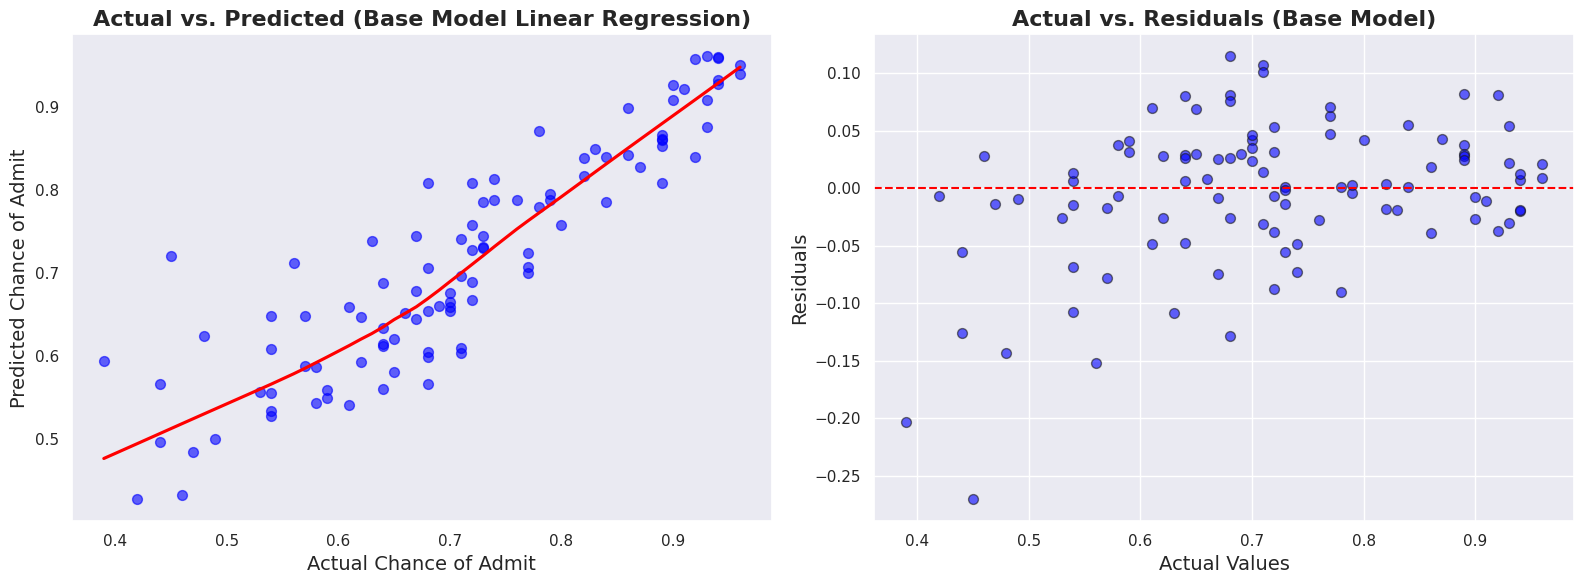

In [60]:
plot_actual_vs_predicted_and_residuals(y_test, y_test_pred, model_name='Base Model')

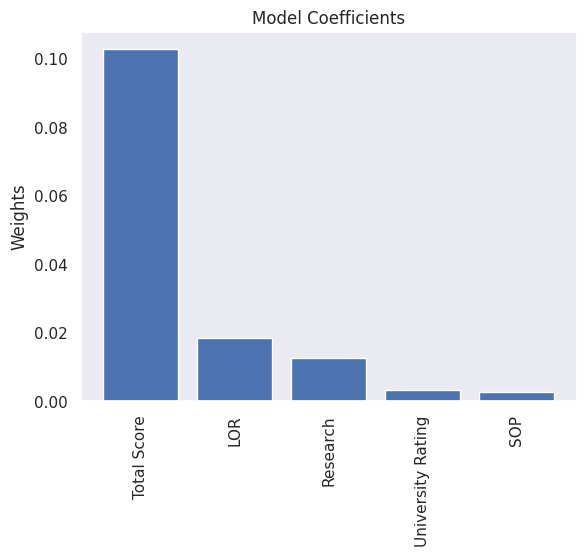

In [61]:
model_weights=list(zip(X_train_columns, lr_model.coef_))
model_weights.sort(key=lambda x:x[1], reverse=True)

features = [i[0] for i in model_weights]
weights = [i[1] for i in model_weights]

plt.bar(x=features, height=weights)
plt.title('Model Coefficients')
plt.ylabel('Weights')
plt.xticks(rotation=90)
plt.show()


*   The test scores (CGPA, GRE and TOEFL) have the heighest weight, i.e, they contribute more to the chance of admit.
*   University Rating and SOP has the least weights.

**OLS**

In [62]:
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

ols_model = sm.OLS(np.array(y_train), X_train_sm).fit()
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     341.1
Date:                Thu, 12 Dec 2024   Prob (F-statistic):          1.11e-140
Time:                        16:53:28   Log-Likelihood:                 552.38
No. Observations:                 400   AIC:                            -1093.
Df Residuals:                     394   BIC:                            -1069.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7242      0.00

Both the University Rating and SOP show P-values well above 0.05, indicating they hold very little significance concerning the output.

In [63]:
# Cheacking the scores after dropping SOP, as it has high p-value

X_train_sm_new = X_train_sm.drop(['SOP'], axis=1)
ols_model_new = sm.OLS(np.array(y_train), X_train_sm_new).fit()
print(ols_model_new.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     427.1
Date:                Thu, 12 Dec 2024   Prob (F-statistic):          5.80e-142
Time:                        16:53:48   Log-Likelihood:                 552.24
No. Observations:                 400   AIC:                            -1094.
Df Residuals:                     395   BIC:                            -1075.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7242      0.00

There is little change in the r2 and adjusted r2 scores of the model after dropping SOP, but the p-values have been adjusted.

# Linear Regression Assumptions

**Multicolinearity**

In [64]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

In [65]:
vif_scores = calculate_vif(X_train)
print(vif_scores)

             Feature       VIF
0  University Rating  2.571495
1                SOP  2.755265
2                LOR  1.914679
3           Research  1.416290
4        Total Score  2.856031


Since the VIF values are less than 5, we do not need to mitigate the features.

**Linearity of Variables**

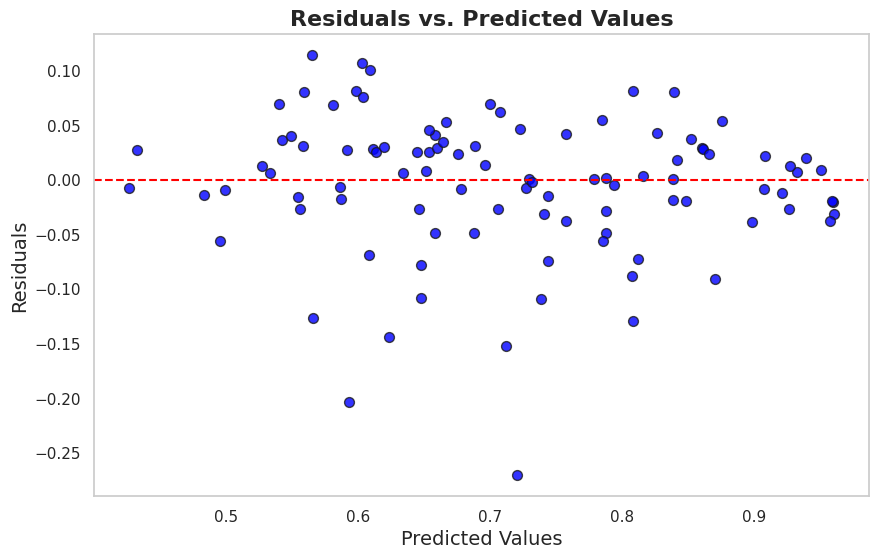

In [67]:
residuals = y_test - y_test_pred

sns.set_theme(style='whitegrid')

plt.figure(figsize=(10, 6))
plt.scatter(y_test_pred, residuals, alpha=0.8, color='blue', edgecolor='k', s=50)

plt.axhline(0, color='red', linestyle='--')

plt.title('Residuals vs. Predicted Values', fontsize=16, fontweight='bold')
plt.xlabel('Predicted Values', fontsize=14)
plt.ylabel('Residuals', fontsize=14)

plt.grid(False)
plt.show()

The points are randomly scattered around the zero line, indicating that the assumption of linearity between the dependent and independent variables holds true.

**Normality of Errors**

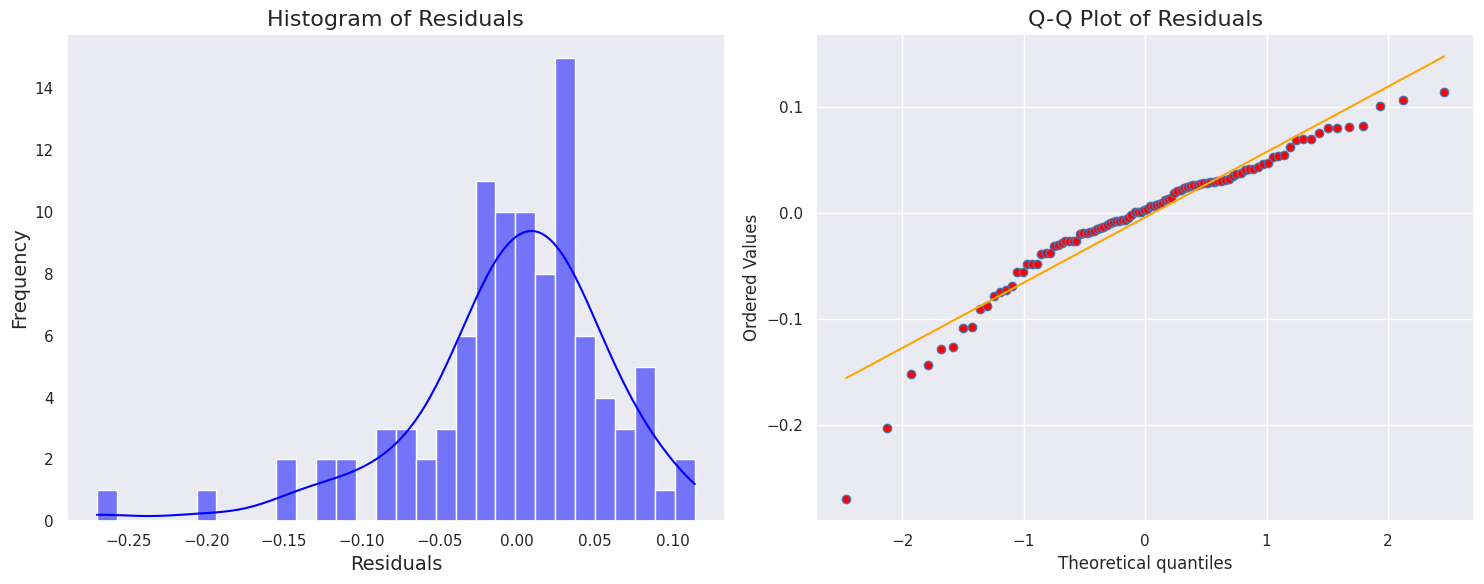

In [68]:
sns.set_theme(style='dark')
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Histogram of Residuals
sns.histplot(residuals, bins=30, kde=True, color='blue', ax=axs[0])
axs[0].set_title('Histogram of Residuals', fontsize=16)
axs[0].set_xlabel('Residuals', fontsize=14)
axs[0].set_ylabel('Frequency', fontsize=14)
axs[0].grid(False)

# Q-Q Plot
stats.probplot(residuals, dist="norm", plot=axs[1])
axs[1].get_lines()[1].set_color('orange')
axs[1].get_lines()[0].set_markerfacecolor('red')
axs[1].set_title('Q-Q Plot of Residuals', fontsize=16)
axs[1].grid(True)

plt.tight_layout()
plt.show()




*  The Q-Q plot visualizes the residuals against a theoretical normal distribution. In this case, we observe some deviation from the line, particularly at the tails, indicating that the residuals may not be perfectly normally distributed.
*  The histogram shows that most residuals are centered around zero, with fewer residuals appearing as you move farther from zero. This observation supports the assumption of a normal distribution, although it isn't perfect.


In [69]:
shapiro_stat, shapiro_p_value = stats.shapiro(residuals)
print(f'Shapiro-Wilk Test Statistic: {shapiro_stat}, p-value: {shapiro_p_value}')

if shapiro_p_value > 0.05:
    print("Fail to reject the null hypothesis: Residuals are normally distributed.")
else:
    print("Reject the null hypothesis: Residuals are not normally distributed.")

Shapiro-Wilk Test Statistic: 0.9247096525772115, p-value: 2.5245126856003332e-05
Reject the null hypothesis: Residuals are not normally distributed.


**Homoscedasticity**

The plot in 'Linearity of Variables' shows that the residuals are homoscedastic. Let's also see if statistical tests support this conclusion.

**Breusch-Pagan Test**

In [70]:
y_test_pred = ols_model.predict(X_test_sm)

y_test = y_test.reset_index(drop=True)
y_test_pred = y_test_pred.reset_index(drop=True)

residuals = y_test - y_test_pred
residuals.shape

(100,)

In [71]:
from statsmodels.stats.diagnostic import het_breuschpagan

bp_test = het_breuschpagan(residuals, X_test_sm)

bp_labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
bp_results = dict(zip(bp_labels, bp_test))

print(bp_results)

{'Lagrange multiplier statistic': 7.905974468175703, 'p-value': 0.1614942564367343, 'f-value': 1.6139192433318212, 'f p-value': 0.16390400650636594}


In [72]:
if bp_results['p-value'] > 0.05:
    print("Fail to reject the null hypothesis: No evidence of heteroscedasticity.")
else:
    print("Reject the null hypothesis: Heteroscedasticity may be present.")

Fail to reject the null hypothesis: No evidence of heteroscedasticity.


## Lasso and Ridge Regression

In [73]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)

Lasso(alpha=0.1)

In [74]:
y_lasso_train_pred, y_lasso_test_pred = model_evaluation(lasso_model, X_train, y_train, X_test, y_test)

Training Set Evaluation:
Root Mean Squared Error: 0.12
R-squared: 0.28
Adjusted R-squared: 0.28

Test Set Evaluation:
Root Mean Squared Error: 0.12
R-squared: 0.29
Adjusted R-squared: 0.25


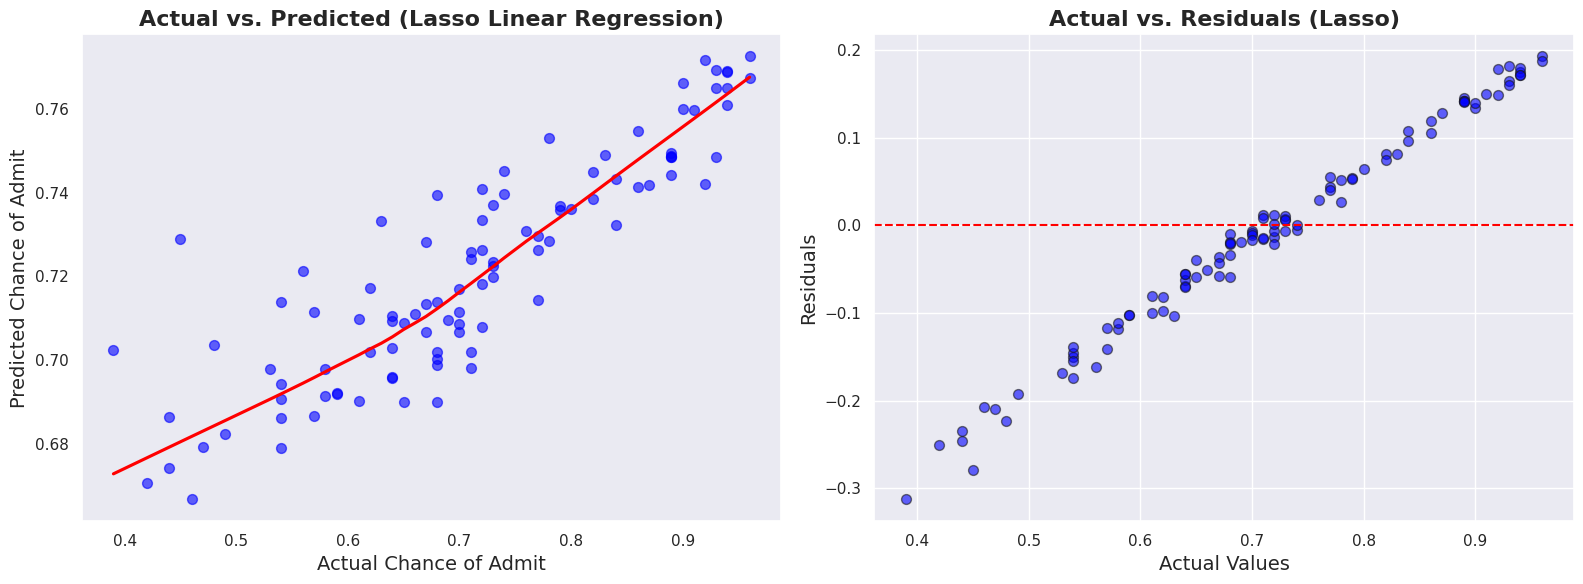

In [75]:
plot_actual_vs_predicted_and_residuals(y_test, y_lasso_test_pred, model_name='Lasso')

Although the residuals are scattered around the zero line, they appear to follow a pattern or spread that is not uniform. This indicates that the model is not capturing some underlying trends in the data.

In [76]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train, y_train)

Ridge(alpha=0.1)

In [77]:
y_ridge_train_pred, y_ridge_test_pred = model_evaluation(ridge_model, X_train, y_train, X_test, y_test)

Training Set Evaluation:
Root Mean Squared Error: 0.06
R-squared: 0.81
Adjusted R-squared: 0.81

Test Set Evaluation:
Root Mean Squared Error: 0.06
R-squared: 0.80
Adjusted R-squared: 0.79


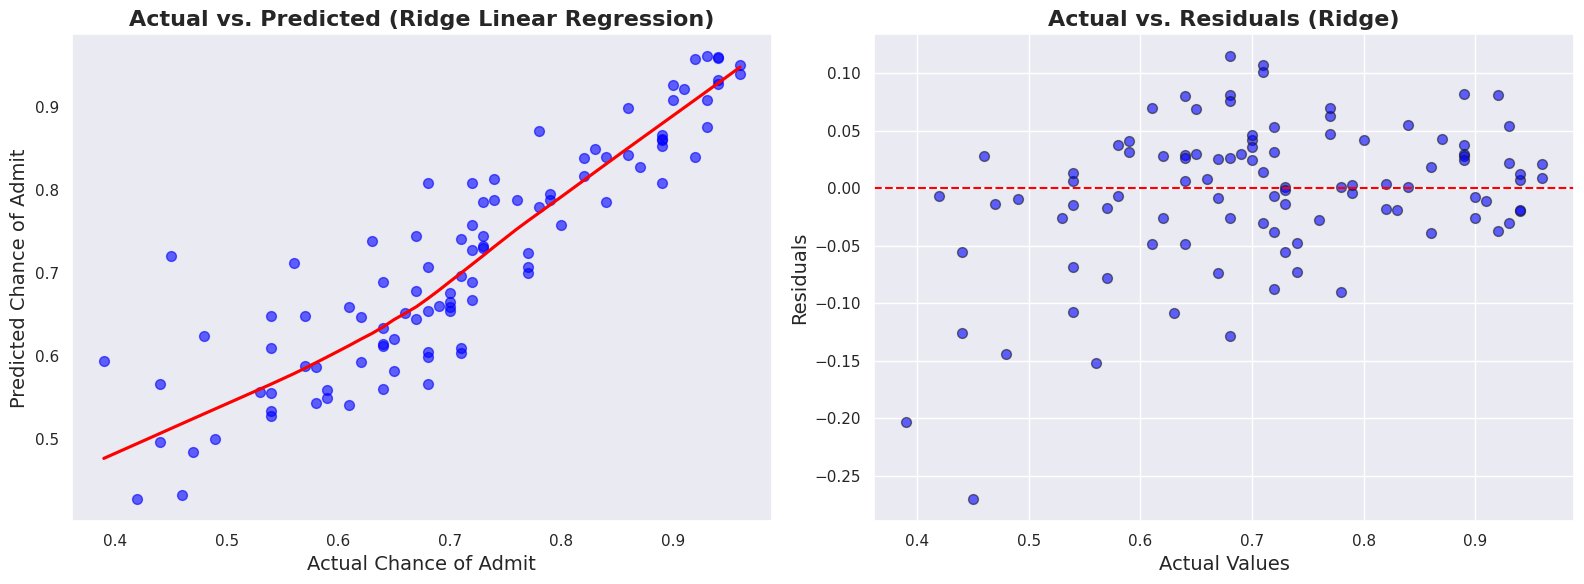

In [78]:
plot_actual_vs_predicted_and_residuals(y_test, y_ridge_test_pred, model_name='Ridge')

The Ridge Model is performing as well as the Base Linear Regression model, and they have the same accuracy.

## Insights and Recommendations

**Insights**



\

1.   Both the Base Linear Model and the Ridge Model are the top-performing models, achieving an accuracy of 81%, while the Lasso Model fails to demonstrate any significant accuracy.
2.   The high collinearity among CGPA, GRE, and TOEFL scores has contributed to a reduction in accuracy, limiting it to 81%.

3.   The combined score holds the highest importance among the features, followed by LOR and Research.
4.   University ratings and SOP have minimal impact on the outcome; however, a strong research background, along with robust LOR and SOP, significantly increases the likelihood of admission.
5.   All the assumptions for Linear Regression were successfully met. Although the Shapiro-Wilk test indicated a deviation from normality, the Q-Q plot reveals no significant deviation from zero.

**Recommendations**



1.   As the "Chance of Admit" is right-skewed, collecting more data on students who were rejected would be beneficial.

2.   To improve prediction accuracy, particularly due to the high correlation among exam scores, it would be advantageous to include additional independent features, such as:


*   **Professional Experience**: Practical experience that offers valuable insights into skills and expertise.
*   **Internships**: Participation in internships that reflect real-world application of knowledge and skills.
*   **Extracurricular Activities**: Participation in clubs, sports, or volunteer work that showcases leadership, teamwork, and a range of interests.
*   **Diversity Factors**: Elements that represent varied backgrounds or perspectives, enhancing the dataset and supporting comprehensive evaluations